Lesson 3 - Applied Regression Modeling - Weighted Least Squares

In [34]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [35]:
def get_airfare_data(save_to_pickle = True):
    
    """
    Get airfare dataset for analysis
    """
    airfare = pd.read_csv('https://data.transportation.gov/api/views/4f3n-jbg2/rows.csv?accessType=DOWNLOAD')
    airfare = airfare.loc[(airfare['Year']==2015)&(airfare['quarter']==4)].drop(columns = ['Year','quarter','citymarketid_1','citymarketid_2','table_1_flag', 'Geocoded_City1', 'Geocoded_City2'])
    airfare = airfare.sort_values(by = 'passengers', ascending=False)
    
    if save_to_pickle:

    # Save as a pickle file
        airfare.to_pickle('./airfare.pkl')
    
    return airfare

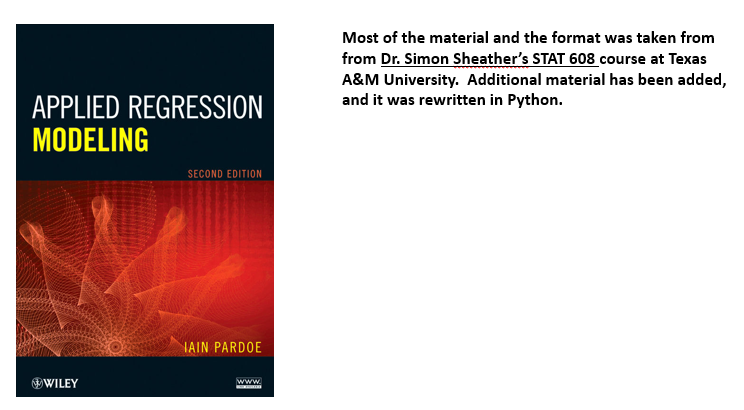

<b>ATTRIBUTION/ CITATION:</b> Most of this material including the course outline was taken from Dr. Simon Sheather's STAT 608 course at Texas A&M University. However, it uses additional examples and was adopted for use with Python. In addition, much of the course material used the textbook Applied Regression Modeling by Iain Pardoe. 

# Weighted Least Squares

- A crucial assumption in any regression analysis is that the errors have constant variance.
- When the variance is found to be nonconstant, one method for overcoming this is weighted least squares (WLS).
- <b><i>Ignoring nonconstant variance when it exists invalidates all inferential tools (i.e., p‐values, confidence intervals, prediction intervals etc.).</b></i>

## <i>Important special case for business data:</i> Weighted least squares for data in the form of averages

- The weighted least squares technique is commonly used in the important special case when Yi is the average of ni observations. For example, when Yi is the average ticket cost for a flight route with ni passengers per day, where ni varies.
- In this case we take the weight wi = ni since the variance of Yi is equal to σ2/ ni, so that the weight increases as the variance decreases. So that flight routes with 10,000 passengers per day are given a much bigger weight than those averaging just 10 passengers per day.

# EXAMPLE: Example: Modeling Average Airline Ticket Price in Quarter 4 2015

## Get Data

SOURCE:  https://www.transportation.gov/policy/aviation-policy/domestic-airline-consumer-airfare-report

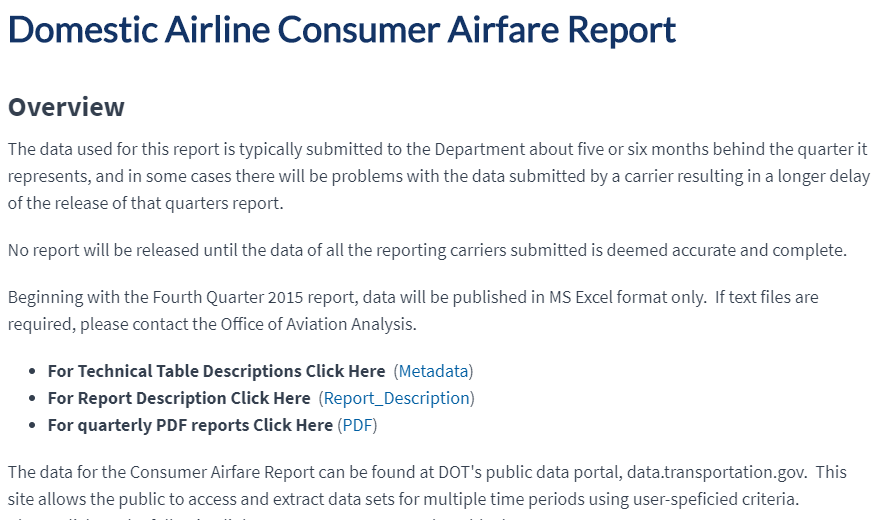

<p>Table 1 of the <b>Domestic Airline Consumer Airfare Report</b> covers the 1,001 largest city‐pair markets in the 48 contiguous states. These markets account for about 75% of all 48‐state passengers and about 70% of total domestic
passengers.</p>

<p>For each of the 1,001 largest city‐pair markets, Table 1 lists the <b>number of oneway passenger trips per day, the nonstop distance, the average market fare, and identifies the airlines with the largest market share and the lowest average fare; market share and average fares are provided for both airlines.</b> Average fares are average prices paid by all fare paying passengers. They therefore cover first class fares paid to carriers offering such service but do not cover free tickets, such as those awarded by carriers offering frequent flyer programs.</p>

In [3]:
if os.path.exists('./airfare.pkl'):
    airfare = pd.read_pickle('./airfare.pkl')
    print("Yay! It's there!")

else:
    airfare = get_airfare_data()
    
print('Length of the dataset is ', len(airfare))
airfare.head(10)

Yay! It's there!
Length of the dataset is  1001


,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
83425,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,21384,143.77,WN,0.6257,146.14,WN,0.6257,146.14
82851,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1139,15559,186.80,B6,0.2715,184.16,B6,0.2715,184.16
81221,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,12356,373.73,UA,0.2396,379.02,B6,0.1952,325.52
77884,"Chicago, IL","New York City, NY (Metropolitan Area)",773,10885,180.52,AA,0.3289,171.67,WN,0.1422,165.99
81931,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2619,9608,375.20,UA,0.2935,448.42,B6,0.1639,310.11
79136,"New York City, NY (Metropolitan Area)","Orlando, FL",989,9500,181.57,B6,0.4792,177.19,B6,0.4792,177.19
76745,"Boston, MA (Metropolitan Area)","Washington, DC (Metropolitan Area)",418,7490,162.24,AA,0.3190,183.15,WN,0.3081,144.79
78348,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",978,7449,160.23,AS,0.6121,161.29,WN,0.1113,152.03
86484,"Atlanta, GA (Metropolitan Area)","New York City, NY (Metropolitan Area)",795,7289,216.50,DL,0.6109,241.36,WN,0.1356,151.43
82357,"Chicago, IL","Los Angeles, CA (Metropolitan Area)",1750,6789,213.79,AA,0.3229,227.80,WN,0.2236,198.94


## Data

- We wish to model: Overall Average One Way Fare <b>(fare)</b>, 
    - Y as a function of X, Distance <b>(nsmiles)</b>.
- A complication is that the 1001 routes have a different <b>average number of passengers per day</b> (which is given in the column headed <b>passengers</b>). We can overcome this with Weighted Least Squares.



## Weighted Least Squares
We seek the line that fits the data best in the following weighted least squares sense:

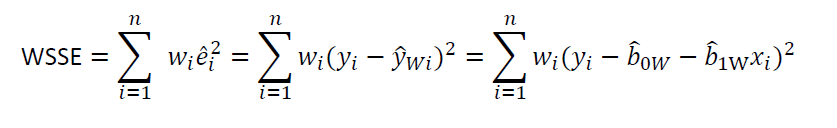

We can use calculus to find the estimated intercept and slope. However, we will use statistical software to find them.

# Airfare vs. Distance (Fit an OLS and WLS model)

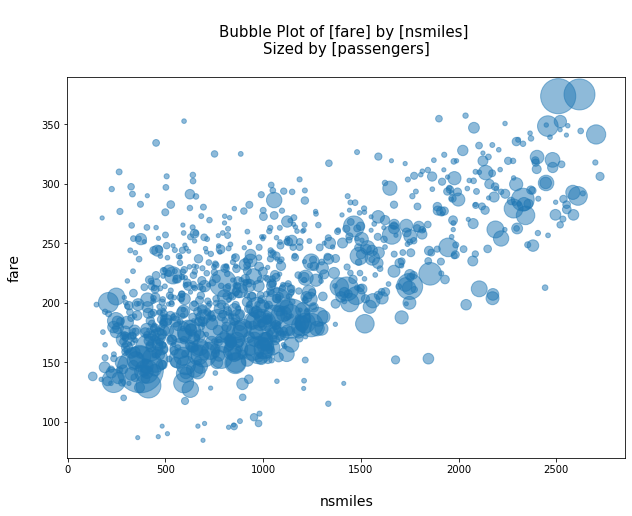

In [36]:
x = airfare['nsmiles']
y = airfare['fare']
w = airfare['passengers']

plt.figure(figsize =  (10, 7))
plt.scatter(x, y, s = w*.10, alpha=0.5)
plt.title('\nBubble Plot of [fare] by [nsmiles] \nSized by [passengers]\n', fontsize = 15)
plt.xlabel('\nnsmiles', fontsize = 14)
plt.ylabel('fare\n', fontsize = 14)
plt.show()

## Fit an Ordinary Least Squares Model (OLS)

In [37]:
import statsmodels.api as sm

# get data
OSL_data = airfare.copy()

# initial x and y variables
x = OSL_data['nsmiles']
y = OSL_data['y'] = OSL_data['fare']

# adding a constant
x = sm.add_constant(x)

# build model 
model = sm.OLS(y, x)                       # passing in target to the model architecture
fitted = model.fit()                       # operation causes it to calculate the values for the coefficients

# make predictions
y_hat = OSL_data['y_hat'] = fitted.predict(x)  # makes predictions "yhat"

# calculate standard model diagnostics
influence = fitted.get_influence()
OSL_data['y_err'] = y - y_hat                            # residuals
OSL_data['y_st'] = influence.resid_studentized_external  # studentized residuals
OSL_data['h'] = influence.hat_matrix_diag                # leverage
OSL_data['cooks_d'] = influence.cooks_distance[0]        # Cook's Distance

In [38]:
OSL_data.head()

,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,y,y_hat,y_err,y_st,h,cooks_d
83425,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,21384,143.77,WN,0.6257,146.14,WN,0.6257,146.14,143.77,179.693382,-35.923382,-0.889215,0.002289,0.000907
82851,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1139,15559,186.80,B6,0.2715,184.16,B6,0.2715,184.16,186.80,222.406127,-35.606127,-0.880793,0.001014,0.000394
81221,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,12356,373.73,UA,0.2396,379.02,B6,0.1952,325.52,373.73,298.754462,74.975538,1.862434,0.006645,0.011573
77884,"Chicago, IL","New York City, NY (Metropolitan Area)",773,10885,180.52,AA,0.3289,171.67,WN,0.1422,165.99,180.52,202.024296,-21.504296,-0.531880,0.001226,0.000174
81931,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2619,9608,375.20,UA,0.2935,448.42,B6,0.1639,310.11,375.20,304.824461,70.375539,1.748586,0.007528,0.011572


### Statsmodels does not automaticaly display the RMSE (Root Mean Square Error)
- We can use the <b>sklearn</b> library to calculate it. 

In [40]:
import sklearn
import math
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculate summary statistics
mse = sklearn.metrics.mean_squared_error(OSL_data['y'], OSL_data['y_hat']) #mean_squared_error(y, y_hat)
rmse = math.sqrt(mse)

# fit statistics
summary = fitted.summary()

### Display OLS Model Results With a Bubble Plot Weighted by The Number of Passengers on Each Route

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     702.8
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.08e-117
Time:                        09:21:33   Log-Likelihood:                -5122.9
No. Observations:                1001   AIC:                         1.025e+04
Df Residuals:                     999   BIC:                         1.026e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.9774      2.574     61.774      0.0

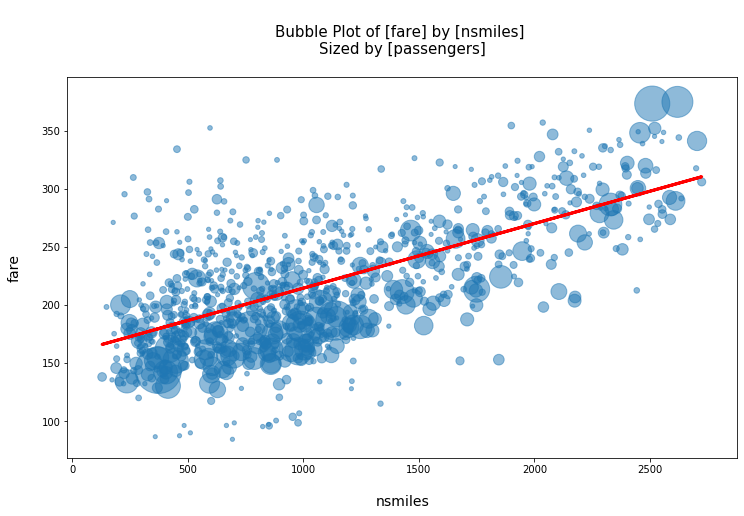

In [41]:
# print summary data and model 
print(summary)
print('\n-----------\nRoot Mean Squared Error {}'.format(round(rmse,3)))

x = OSL_data['nsmiles']
y = OSL_data['fare']
w = OSL_data['passengers']

yhat = OSL_data['y_hat']

plt.figure(figsize =  (12, 7))
plt.plot(x, yhat, color = 'red', linewidth = 3)
plt.scatter(x, y, s = w*.10, alpha=0.5)
plt.title('\nBubble Plot of [fare] by [nsmiles] \nSized by [passengers]\n', fontsize = 15)
plt.xlabel('\nnsmiles', fontsize = 14)
plt.ylabel('fare\n', fontsize = 14)
plt.show()

## Fit a Weighted Least Squares Model (WLS) weighted by the passengers on each route

In [42]:
import statsmodels.api as sm
import sklearn
import math
from sklearn.metrics import mean_squared_error
from math import sqrt

# get data
WLS_data = airfare.copy()

# establish initial x, y, and w variables (w stands for "weight")
x = WLS_data['nsmiles']
y = WLS_data['y'] = OSL_data['fare']
w = WLS_data['passengers']

# adding a constant
x = sm.add_constant(x)

# build model 
model_wls = sm.WLS(y, x, weights=w)
#model = sm.OLS(y, x)                   # passing in target to the model architecture
fitted_wls = model_wls.fit()            # operation causes it to calculate the values for the coefficients

# make predictions
y_hat = WLS_data['y_hat'] = fitted_wls.predict(x)  # makes predictions "yhat"

### Statsmodels does not have a .get_influence function for WLS -- use the following work around

You can get the influence and outlier measures for the weighted variables by using OLS on the weighted variables.
- <b>.wndog</b> is a method on used on the WLS model that gives you the weighted endogenous variables
- <b>.wexog</b> is a method on used on the WLS model that gives you the weighted exogenouse variables

Most or all influence measures will be correct but they are in terms of weighted variables and observations.

In [43]:
res = sm.OLS(model_wls.wendog, model_wls.wexog).fit()
influence = res.get_influence()

# calculate standard model diagnostics
WLS_data['y_err'] = y - y_hat                            # residuals
WLS_data['y_st'] = influence.resid_studentized_external  # studentized residuals
WLS_data['h'] = influence.hat_matrix_diag                # leverage
WLS_data['cooks_d'] = influence.cooks_distance[0]        # Cook's Distance

                            WLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.597
Model:                            WLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1482.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.55e-199
Time:                        09:25:58   Log-Likelihood:                -5251.1
No. Observations:                1001   AIC:                         1.051e+04
Df Residuals:                     999   BIC:                         1.052e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.0538      2.222     59.875      0.0

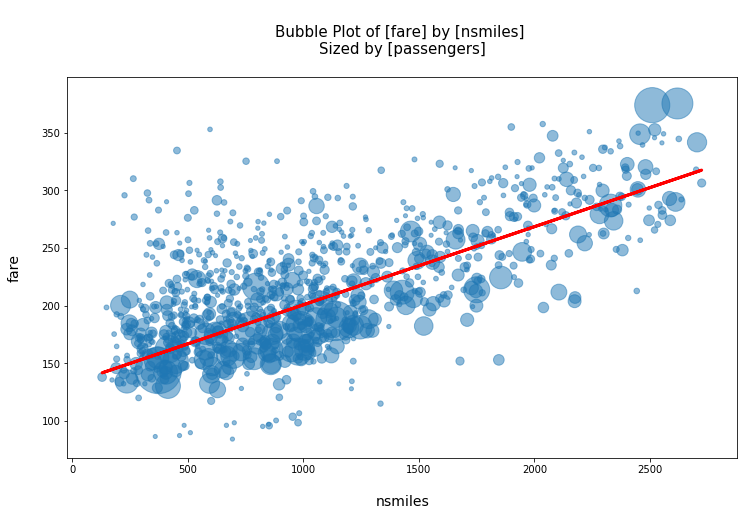

In [44]:
# calculate summary statistics
mse = sklearn.metrics.mean_squared_error(WLS_data['y'], WLS_data['y_hat']) #mean_squared_error(y, y_hat)
rmse = math.sqrt(mse)
summary = fitted_wls.summary()

# print summary data and model 
print(summary)
print('\n-----------\nRoot Mean Squared Error {}'.format(round(rmse,3)))

x = WLS_data['nsmiles']
y = WLS_data['fare']
z = WLS_data['passengers']
yhat = WLS_data['y_hat']

plt.figure(figsize =  (12, 7))
plt.plot(x, yhat, color = 'red', linewidth = 3)
plt.scatter(x, y, s = z*.10, alpha=0.5)
plt.title('\nBubble Plot of [fare] by [nsmiles] \nSized by [passengers]\n', fontsize = 15)
plt.xlabel('\nnsmiles', fontsize = 14)
plt.ylabel('fare\n', fontsize = 14)
plt.show()


## The WLS and LS Fit Average Airline Ticket Price as  Linear Function of Distance

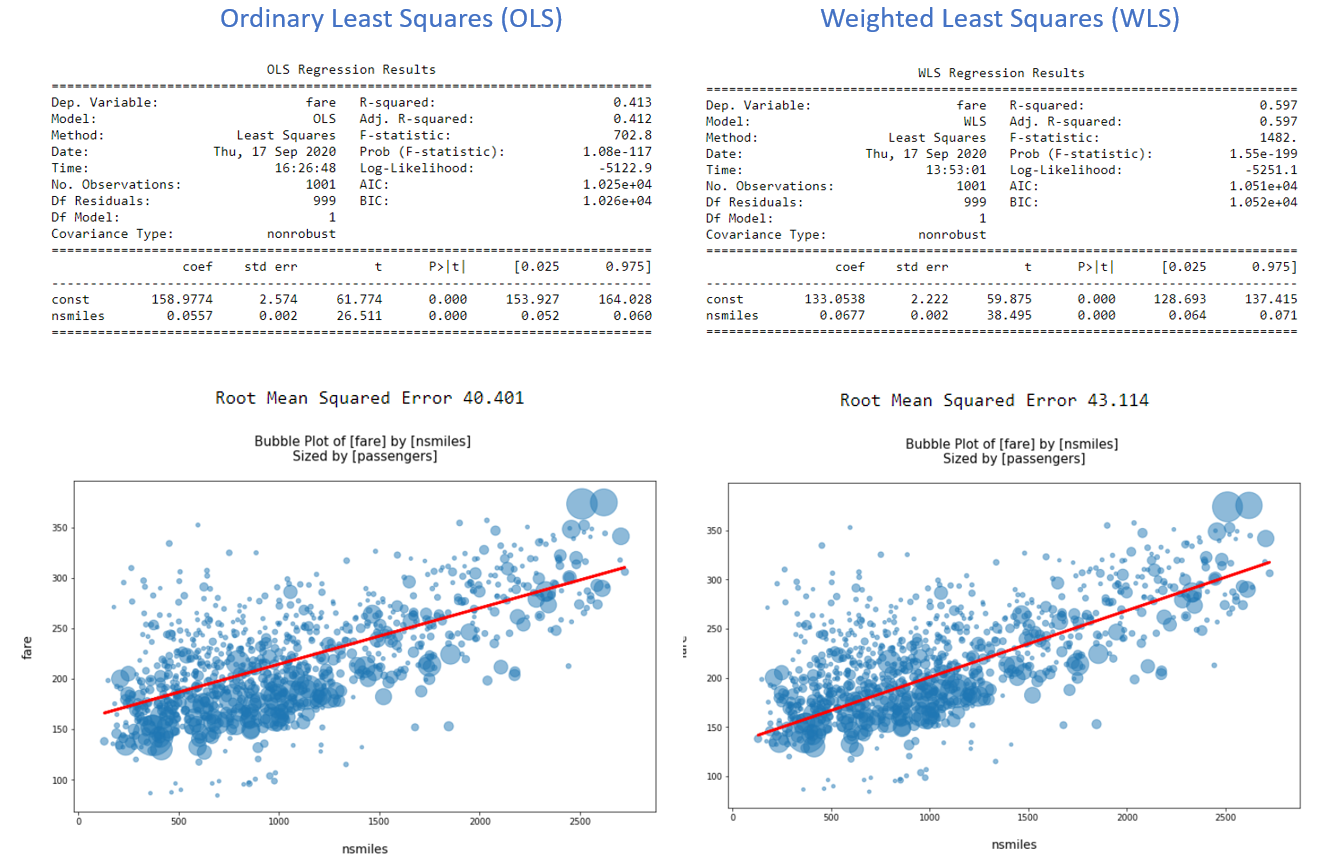

### Conclusions:
- The WLS and LS estimates of the slope and the intercept parameters are quite different. 

### Exercise Questions:
- How would you interpret the coefficients (not the intercept) in each model?
- How would you interpret the intercept in each model?
- Why would you want it to be weighted?
- Why is the Root Mean Square Error (RMSE) higher for Weighted Least Squares (WLS) than Ordinary Least Squares (OLS)?

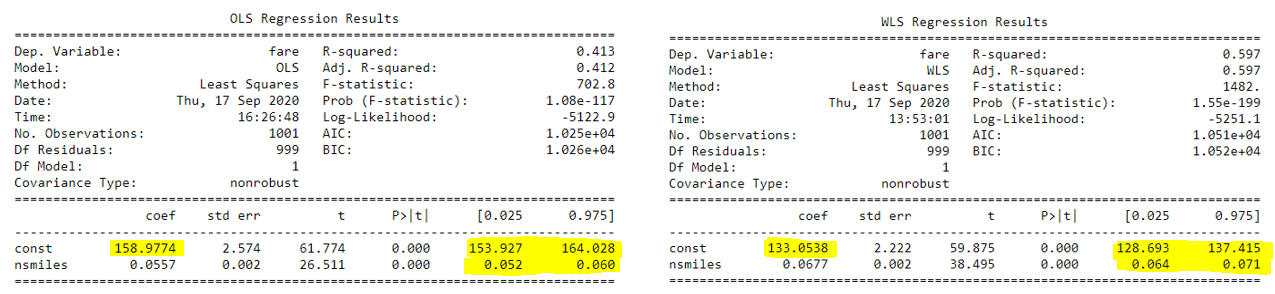

<p>
<b>Question 1.</b>  The nsmiles coeffients in both models are statistically significant, but according to the OLS model the airlines earn between 5.2 cents and 0.6 cents per mile and according to the WLS model the airlines are earning 6.4 cents to 7.1 cents per mile. That is a huge difference. So this demonstrates that the weights matter a lot!</p>
<p>
<b>Question 2.</b>  The intercept shows the fixed price of a ticket if you were traveling zero miles.  However, the OLS model shows that the fixed price of a ticket is between 154 dollars and 164 dollars while the WLS shows that it's between 129 and 137.  That is also a big difference with and without the weight.</p>
<p>
<b>Question 3.</b>  In this instance we want to concentrate on certain areas (like low input value). OLS can’t “target” specific areas, while weighted least squares works well for this task. You may want to highlight specific areas in your study: ones that might be costly, expensive or painful to reproduce. By giving these areas bigger weights than others, you pull the analysis to that region’s data.</p>
<p>
<b>Question 4.</b> The OLS fits to the line of best according the lowest Sum of Squared Errors (SSE).  So the square root of the mean of the squared errors will be lower for the OLS fit than the alternative fit. 


## WLS Model Diagnostics

### Residual Plots

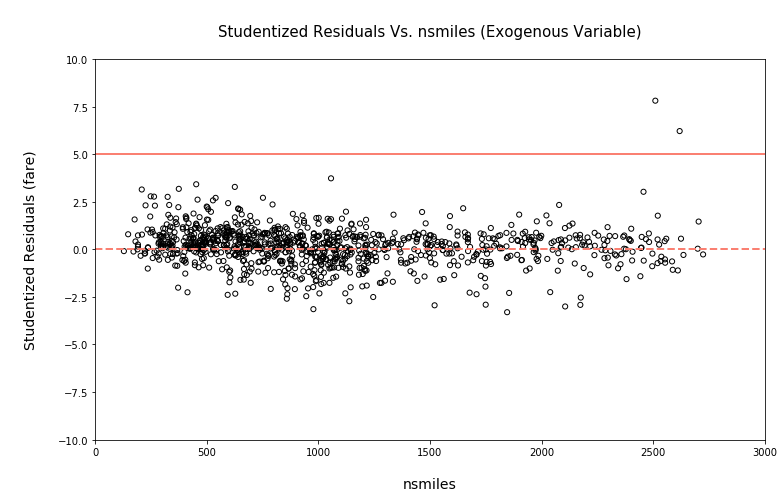

In [45]:
plt.figure(figsize = (12,7))
plt.scatter(WLS_data['nsmiles'],WLS_data['y_st'], s = 26,  facecolors='none', edgecolors='black')
plt.title('\nStudentized Residuals Vs. nsmiles (Exogenous Variable)\n', fontsize = 15)
plt.axhline(y = 0, color = 'salmon', linestyle = '--', linewidth = 2)
plt.axhline(y = 5, color = 'salmon', linestyle = '-', linewidth = 2)
plt.xlabel('\nnsmiles', fontsize = 14)
plt.ylabel('\nStudentized Residuals (fare)\n', fontsize = 14)
plt.xlim(0, 3000)
plt.ylim(-10.0, 10.0)
plt.show()

#### Conclusions:
- 2 Points have a studentized residual > 5
- No clear non random pattern in plot

## What should we do next?


Answer

Find the outlying values

In [46]:
WLS_data.loc[WLS_data['y_st'] >= 5]

,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,y,y_hat,y_err,y_st,h,cooks_d
81221,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,12356,373.73,UA,0.2396,379.02,B6,0.1952,325.52,373.73,302.946600,70.783400,7.813410,0.079033,2.470941
81931,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2619,9608,375.20,UA,0.2935,448.42,B6,0.1639,310.11,375.20,310.324414,64.875586,6.216082,0.069624,1.393288


### ANSWER: You have identified the two largest markets in the data set in terms of passengers.  You can't ignore the two largest markets in the airline industry. You will get fired as an analyst! If you said to screen them out, then put your headhunter on speed dial!

## Influence

### Let's look at their influcence by plotting Cook's Distance

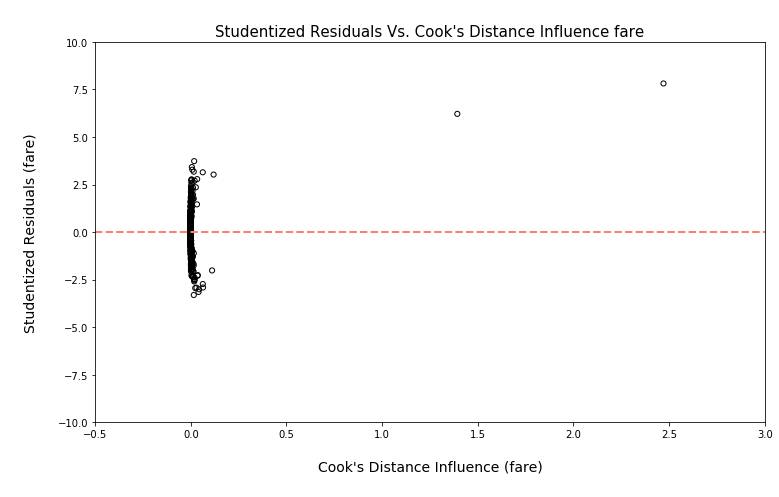

In [47]:
plt.figure(figsize = (12,7))
plt.scatter(WLS_data['cooks_d'],WLS_data['y_st'], s = 26,  facecolors='none', edgecolors='black')
plt.title("\nStudentized Residuals Vs. Cook's Distance Influence fare", fontsize = 15)
plt.axhline(y = 0, color = 'salmon', linestyle = '--', linewidth = 2)
plt.xlabel("\nCook's Distance Influence (fare)\n", fontsize = 14)
plt.ylabel('\nStudentized Residuals (fare)\n', fontsize = 14)
plt.xlim(-0.5, 3.0)
plt.ylim(-10.0, 10.0)
plt.show()

Look at the two larger values for Cook's Distance (although these should not be leverage points) they are not greater than 5 we are in trouble because these are the two largest markets and we can't ignore them! 

In [48]:
WLS_data[['city1','city2','y_st','cooks_d']].loc[WLS_data['cooks_d'] >= 1]

,city1,city2,y_st,cooks_d
81221,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",7.813410,2.470941
81931,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",6.216082,1.393288


#### Conclusions
- Los Angeles to New York and New York to San Francisco have Cook's Distance Values > 1 and Studentized Residuals > 5
- What should we do next?

### Investigate why the cook's distance is large, and why the two outlying values by looking at the weights applied to them. 

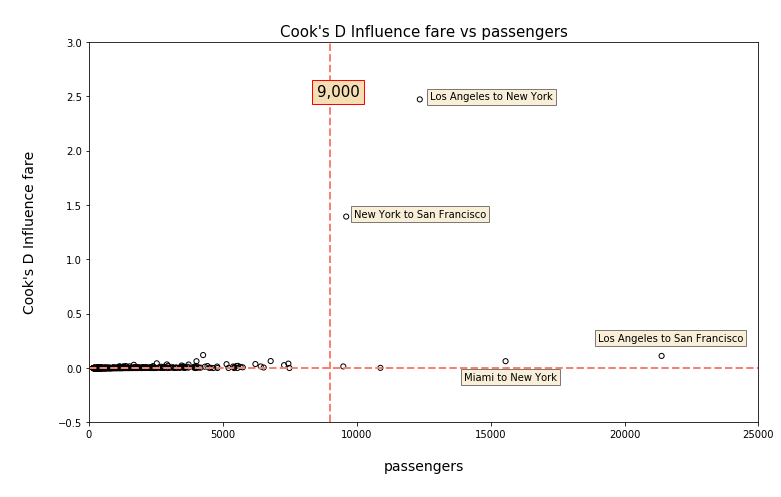

In [49]:
plt.figure(figsize = (12,7))
plt.scatter(WLS_data['passengers'], WLS_data['cooks_d'], s = 26,  facecolors='none', edgecolors='black')
plt.title("\nCook's D Influence fare vs passengers", fontsize = 15)
plt.axhline(y = 0, color = 'salmon', linestyle = '--', linewidth = 2)
plt.axvline(x = 9000, color = 'salmon', linestyle = '--', linewidth = 2)

box_props = dict(boxstyle="square",facecolor='wheat', alpha=0.5)
plt.text(8500, 2.5, '9,000', size=15, bbox=dict(boxstyle="square",edgecolor='red', facecolor='wheat'))
plt.text(9900, 1.39, 'New York to San Francisco',  size=10, bbox=box_props)
plt.text(12750, 2.47, 'Los Angeles to New York',  size=10, bbox=box_props)
plt.text(19000, 0.25, 'Los Angeles to San Francisco',  size=10, bbox=box_props)
plt.text(14000, -0.11, 'Miami to New York',  size=10, bbox=box_props)

plt.xlabel("\npassengers\n", fontsize = 14)
plt.ylabel("\nCook's D Influence fare\n", fontsize = 14)
plt.xlim(0, 25000)
plt.ylim(-0.5, 3.0)
plt.show()

In [50]:
WLS_data[['city1','city2','nsmiles','passengers','cooks_d']].loc[WLS_data['passengers'] >= 9000].sort_values(by = 'passengers')

,city1,city2,nsmiles,passengers,cooks_d
79136,"New York City, NY (Metropolitan Area)","Orlando, FL",989,9500,0.014739
81931,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2619,9608,1.393288
77884,"Chicago, IL","New York City, NY (Metropolitan Area)",773,10885,0.001653
81221,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,12356,2.470941
82851,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1139,15559,0.062995
83425,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,21384,0.111537


### Conclusions:
- The large values of Cook's Distance are partly explained by the large numbers of passengers on those routes.
- What should we do next?

# Extra.....

# There must be something else having an impact on the values. It's time to seek out an SME (Subject Matter Expert) for help!

These are the things they tell you to look at:


## Slot Control: 
There is a fixed number of takeoffs and landings from New York.  Therefore that has an impact on the revenue an airline can earn from each flight there. <p>The Federal Aviation Administration (FAA) uses runway slots to limit scheduled air traffic at certain capacity constrained airports. Level 3 (or “schedule coordinated”) airports are those where it is necessary for all airlines and other aircraft operators to have a slot allocated by a coordinator in order to arrive or depart at the airport during the periods when slot allocation occurs</p>

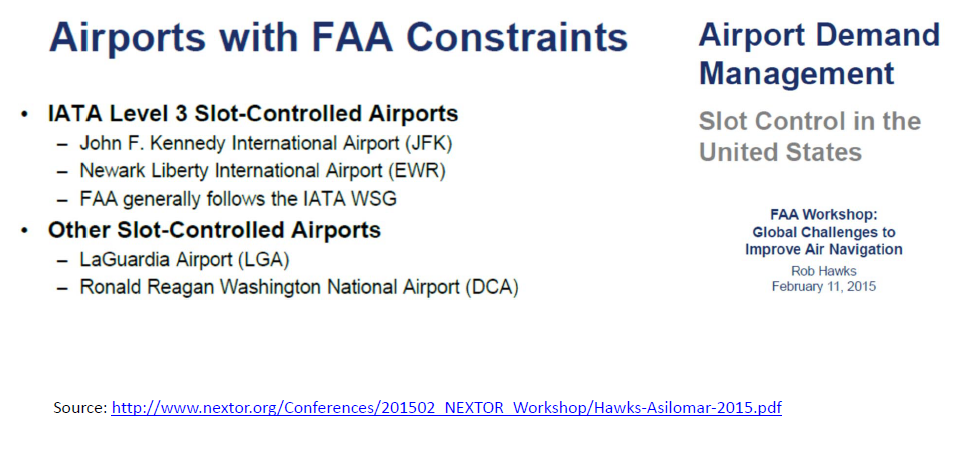

## Add Dummy Variables
In view of this we shall subsequently add the following dummy variables as predictors in the model:
- <b>Slot controlled = 1 </b>(0) if all airports in the metro area are slot controlled (not) (i.e. New York)
- <b>Partially slot controlled = 1 </b>(0) if some airports in the metro area are slot controlled (not) (i.e. Washington DC due to Regan National Airport)

In [51]:
# create the dummy column

# get data
data = airfare.copy()

# create column and assign dummy value
data['slot_controlled'] = 0
data['partially_controlled'] = 0

# establish slot airports and partially slot controled airports
#'New York City, NY (Metropolitan Area)' 
#'Washington, DC (Metropolitan Area)'

# assign dummy variables to those cities
data.loc[((data['city1']=='New York City, NY (Metropolitan Area)')|
          (data['city2']=='New York City, NY (Metropolitan Area)')), 'slot_controlled'] = 1

# assign dummy variables to those cities
data.loc[((data['city1']=='Washington, DC (Metropolitan Area)')|
          (data['city2']=='Washington, DC (Metropolitan Area)')), 'partially_controlled'] = 1

# display dummy variables in those cities
display(data[['city1','city2','slot_controlled','partially_controlled']].loc[((data['city1']=='New York City, NY (Metropolitan Area)')|
          (data['city1']=='Washington, DC (Metropolitan Area)')|
          (data['city2']=='New York City, NY (Metropolitan Area)')|
          (data['city2']=='Washington, DC (Metropolitan Area)'))].head(20))



,city1,city2,slot_controlled,partially_controlled
82851,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1,0
81221,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1,0
77884,"Chicago, IL","New York City, NY (Metropolitan Area)",1,0
81931,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",1,0
79136,"New York City, NY (Metropolitan Area)","Orlando, FL",1,0
76745,"Boston, MA (Metropolitan Area)","Washington, DC (Metropolitan Area)",0,1
86484,"Atlanta, GA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1,0
82543,"Dallas/Fort Worth, TX","New York City, NY (Metropolitan Area)",1,0
76520,"New York City, NY (Metropolitan Area)","West Palm Beach/Palm Beach, FL",1,0
79225,"Miami, FL (Metropolitan Area)","Washington, DC (Metropolitan Area)",0,1


### Make a WLS Model

In [52]:
# establish initial x, y, and w variables (w stands for "weight")
X = data[['nsmiles', 'slot_controlled','partially_controlled']]
y = data['y'] = data['fare']
w = data['passengers']

# adding a constant
X = sm.add_constant(X)

# build model 
model_wls = sm.WLS(y, X, weights=w)
#model = sm.OLS(y, x)                   # passing in target to the model architecture
fitted_wls = model_wls.fit()            # operation causes it to calculate the values for the coefficients

# make predictions
y_hat = data['y_hat'] = fitted_wls.predict(X)  # makes predictions "yhat"

# model diagnostics
res = sm.OLS(model_wls.wendog, model_wls.wexog).fit()
influence = res.get_influence()

# calculate standard model diagnostics
data['y_err'] = y - y_hat                            # residuals
data['y_st'] = influence.resid_studentized_external  # studentized residuals
data['h'] = influence.hat_matrix_diag                # leverage
data['cooks_d'] = influence.cooks_distance[0]        # Cook's Distance

# calculate summary statistics
mse = sklearn.metrics.mean_squared_error(data['y'], data['y_hat']) #mean_squared_error(y, y_hat)
rmse = math.sqrt(mse)
summary = fitted_wls.summary()

# print summary data and model 
print(summary)
print('\n-----------\nRoot Mean Squared Error {}'.format(round(rmse,3)))


                            WLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.620
Model:                            WLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     542.9
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          4.39e-209
Time:                        09:53:55   Log-Likelihood:                -5221.7
No. Observations:                1001   AIC:                         1.045e+04
Df Residuals:                     997   BIC:                         1.047e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  130.2798 

### Exercise:  How much does slot control increase the fare?

### Predicted Vs. Actual Plot Sized By Passengers

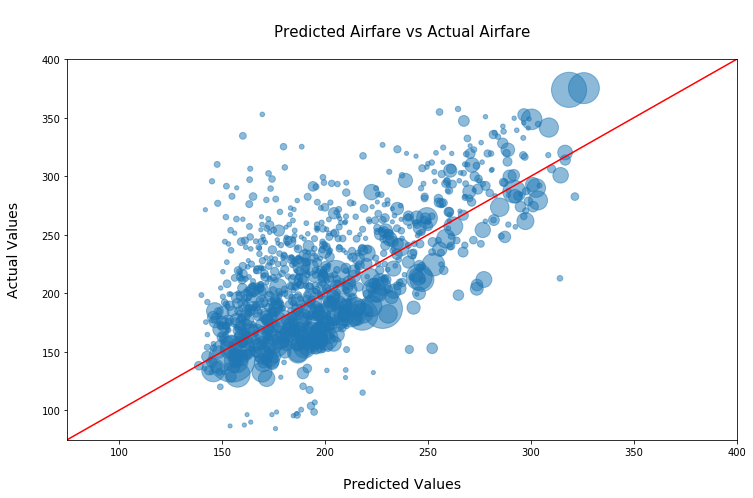

In [53]:
y = data['fare']
yhat = data['y_hat']
z = data['passengers']

plt.figure(figsize =  (12, 7))
plt.scatter(yhat, y, s = z*.10, alpha=0.5)
#plt.scatter(yhat,y, s = 26,  facecolors='none', edgecolors='black')


plt.title('\nPredicted Airfare vs Actual Airfare\n', fontsize = 15)
plt.xlabel('\nPredicted Values', fontsize = 14)
plt.ylabel('Actual Values\n', fontsize = 14)
plt.xlim(75, 400)
plt.ylim(75, 400)

x_line = [75, 400]
y_line = [75, 400]
plt.plot(x_line, y_line, color = 'red')
plt.show()

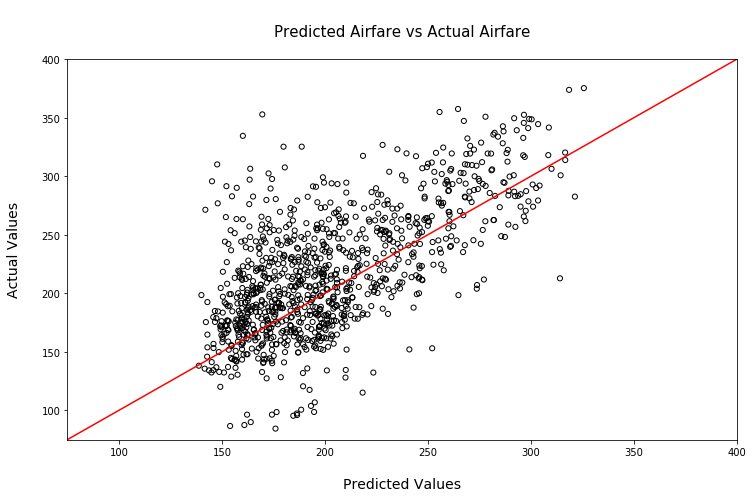

In [54]:
y = data['fare']
yhat = data['y_hat']
z = data['passengers']

plt.figure(figsize =  (12, 7))
#plt.scatter(yhat, y, s = z*.10, alpha=0.5)
plt.scatter(yhat,y, s = 26,  facecolors='none', edgecolors='black')


plt.title('\nPredicted Airfare vs Actual Airfare\n', fontsize = 15)
plt.xlabel('\nPredicted Values', fontsize = 14)
plt.ylabel('Actual Values\n', fontsize = 14)
plt.xlim(75, 400)
plt.ylim(75, 400)

x_line = [75, 400]
y_line = [75, 400]
plt.plot(x_line, y_line, color = 'red')
plt.show()

## Residual Plot

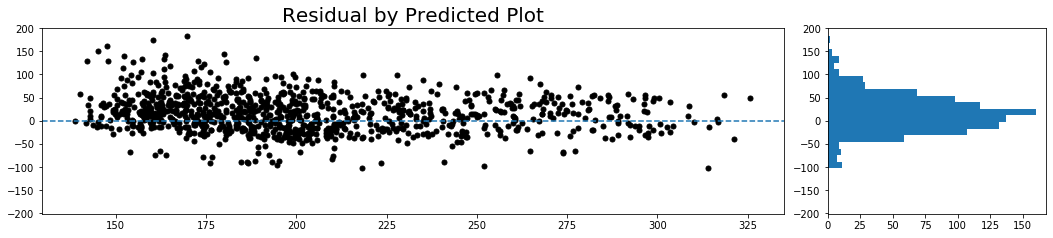

In [55]:
fig = plt.figure(figsize = (18,7))
ax1 = plt.subplot2grid((8, 4), (0, 0), rowspan=4, colspan=3)
ax2 = plt.subplot2grid((8, 4), (0, 3), rowspan=4, colspan=1)

ax1.scatter(data['y_hat'], data['y_err'], s = 25, color = 'black')
ax1.axhline(y=0, linestyle = '--')
ax1.set_ylim(bottom = -data['y_err'].max()*1.10,top = data['y_err'].max()*1.10)
ax1.set_title('Residual by Predicted Plot', fontsize = 20)
ax2.hist(data['y_err'], bins = 20, orientation='horizontal')
ax2.set_ylim(bottom = -data['y_err'].max()*1.10,top = data['y_err'].max()*1.10)
plt.show()

# Cook's Distance

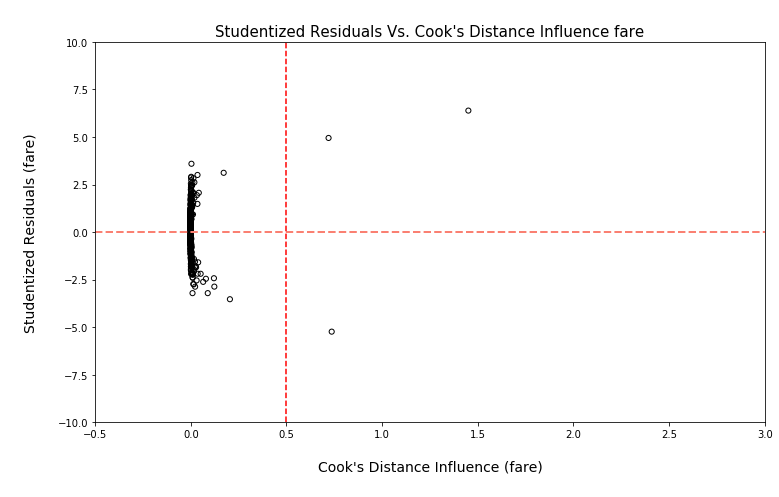

In [56]:
plt.figure(figsize = (12,7))
plt.scatter(data['cooks_d'],data['y_st'], s = 26,  facecolors='none', edgecolors='black')
plt.title("\nStudentized Residuals Vs. Cook's Distance Influence fare", fontsize = 15)
plt.axhline(y = 0, color = 'salmon', linestyle = '--', linewidth = 2)
plt.axvline(x = 0.5, linestyle = '--', color = 'red')
plt.xlabel("\nCook's Distance Influence (fare)\n", fontsize = 14)
plt.ylabel('\nStudentized Residuals (fare)\n', fontsize = 14)

plt.xlim(-0.5, 3.0)
plt.ylim(-10.0, 10.0)
plt.show()

In [57]:
data.loc[data['cooks_d'] > 0.5] 

,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,slot_controlled,partially_controlled,y,y_hat,y_err,y_st,h,cooks_d
82851,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1139,15559,186.80,B6,0.2715,184.16,B6,0.2715,184.16,1,0,186.80,228.039724,-41.239724,-5.229905,0.099570,0.736678
81221,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,12356,373.73,UA,0.2396,379.02,B6,0.1952,325.52,1,0,373.73,318.486742,55.243258,6.388768,0.128829,1.451037
81931,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2619,9608,375.20,UA,0.2935,448.42,B6,0.1639,310.11,1,0,375.20,325.677643,49.522357,4.949986,0.107433,0.720319


# Now we have more outliers! What do we do now?  Go back to the SME. 


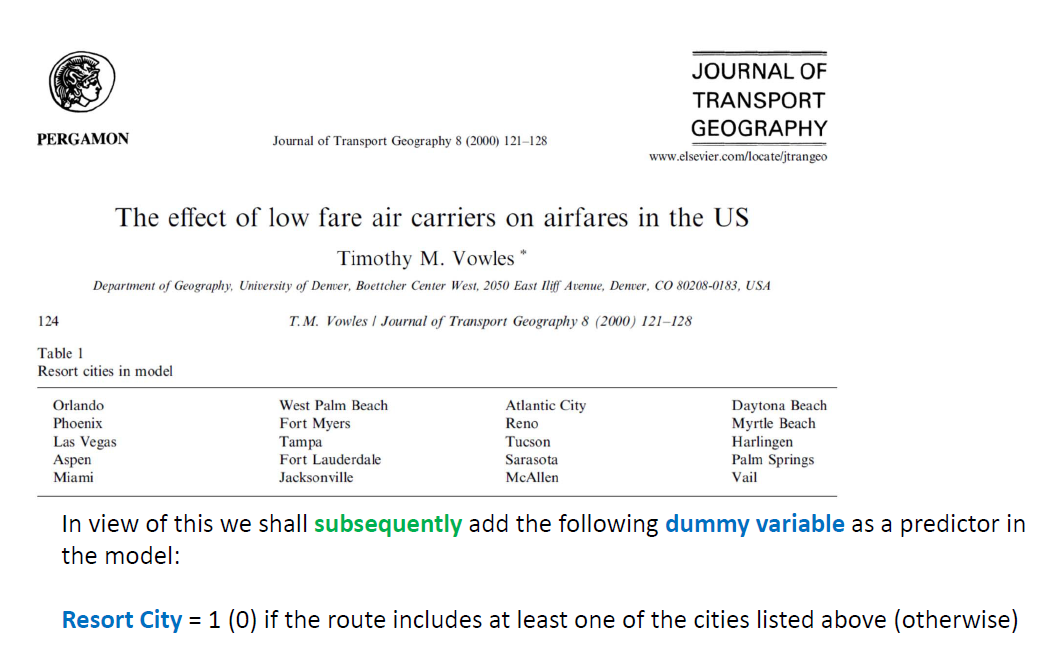

## Re-establish the dataframe

In [58]:
# create the dummy column

# get data
data = airfare.copy()

# create column and assign dummy value
data['slot_controlled'] = 0
data['partially_controlled'] = 0

# establish slot airports and partially slot controled airports
#'New York City, NY (Metropolitan Area)' 
#'Washington, DC (Metropolitan Area)'

# assign dummy variables to those cities
data.loc[((data['city1']=='New York City, NY (Metropolitan Area)')|
          (data['city2']=='New York City, NY (Metropolitan Area)')), 'slot_controlled'] = 1

# assign dummy variables to those cities
data.loc[((data['city1']=='Washington, DC (Metropolitan Area)')|
          (data['city2']=='Washington, DC (Metropolitan Area)')), 'partially_controlled'] = 1

## Create a dummy variable for resort cities

In [59]:
data['resort_city']=0

subsidized_resort_cities = ['San Francisco','Orlando', 'Phoenix', 'Las Vegas', 'Aspen', 'Miami', 'West Palm Beach', 
                            'Fort Meyers', 'Tampa', 'Fort Lauderdale', 'Jacksonville', 'Atlantic City', 'Reno', 'Tucson'
                            , 'Sarasota', 'McAllen', 'Daytona Beach', 'Myrtle Beach', 'Harlingen', 'Palm Springs', 'Vail']

data.loc[(data['city1'].apply(lambda x: any(city for city in subsidized_resort_cities if city in x))),'resort_city']=1
data.loc[(data['city2'].apply(lambda x: any(city for city in subsidized_resort_cities if city in x))),'resort_city']=1

data[['city1', 'city2', 'resort_city']]

,city1,city2,resort_city
83425,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",1
82851,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1
81221,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",0
77884,"Chicago, IL","New York City, NY (Metropolitan Area)",0
81931,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",1
...,...,...,...
81439,"Bellingham, WA","Phoenix, AZ",1
77242,"Raleigh/Durham, NC","Salt Lake City, UT",0
80608,"Hartford, CT","Nashville, TN",0
82486,"Las Vegas, NV","Peoria, IL",1


In [60]:
# establish initial x, y, and w variables (w stands for "weight")
X = data[['nsmiles', 'slot_controlled','partially_controlled', 'resort_city']]
y = data['y'] = data['fare']
w = data['passengers']

# adding a constant
X = sm.add_constant(X)

# build model 
model_wls = sm.WLS(y, X, weights=w)
#model = sm.OLS(y, x)                   # passing in target to the model architecture
fitted_wls = model_wls.fit()            # operation causes it to calculate the values for the coefficients

# make predictions
y_hat = data['y_hat'] = fitted_wls.predict(X)  # makes predictions "yhat"

# model diagnostics
res = sm.OLS(model_wls.wendog, model_wls.wexog).fit()
influence = res.get_influence()

# calculate standard model diagnostics
data['y_err'] = y - y_hat                            # residuals
data['y_st'] = influence.resid_studentized_external  # studentized residuals
data['h'] = influence.hat_matrix_diag                # leverage
data['cooks_d'] = influence.cooks_distance[0]        # Cook's Distance

# calculate summary statistics
mse = sklearn.metrics.mean_squared_error(data['y'], data['y_hat']) #mean_squared_error(y, y_hat)
rmse = math.sqrt(mse)
summary = fitted_wls.summary()

# print summary data and model 
print(summary)
print('\n-----------\nRoot Mean Squared Error {}'.format(round(rmse,3)))


                            WLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.659
Model:                            WLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     480.2
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.36e-230
Time:                        10:02:18   Log-Likelihood:                -5168.6
No. Observations:                1001   AIC:                         1.035e+04
Df Residuals:                     996   BIC:                         1.037e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  138.6516 

In [61]:
# establish initial x, y, and w variables (w stands for "weight")
X = data[['nsmiles', 'slot_controlled', 'resort_city']]
y = data['y'] = data['fare']
w = data['passengers']

# adding a constant
X = sm.add_constant(X)

# build model 
model_wls = sm.WLS(y, X, weights=w)
#model = sm.OLS(y, x)                   # passing in target to the model architecture
fitted_wls = model_wls.fit()            # operation causes it to calculate the values for the coefficients

# make predictions
y_hat = data['y_hat'] = fitted_wls.predict(X)  # makes predictions "yhat"

# model diagnostics
res = sm.OLS(model_wls.wendog, model_wls.wexog).fit()
influence = res.get_influence()

# calculate standard model diagnostics
data['y_err'] = y - y_hat                            # residuals
data['y_st'] = influence.resid_studentized_external  # studentized residuals
data['h'] = influence.hat_matrix_diag                # leverage
data['cooks_d'] = influence.cooks_distance[0]        # Cook's Distance

# calculate summary statistics
mse = sklearn.metrics.mean_squared_error(data['y'], data['y_hat']) #mean_squared_error(y, y_hat)
rmse = math.sqrt(mse)
summary = fitted_wls.summary()

# print summary data and model 
print(summary)
print('\n-----------\nRoot Mean Squared Error {}'.format(round(rmse,3)))


                            WLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.658
Model:                            WLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     640.1
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          7.38e-232
Time:                        10:03:57   Log-Likelihood:                -5169.0
No. Observations:                1001   AIC:                         1.035e+04
Df Residuals:                     997   BIC:                         1.037e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             139.1091      2.188     

## Predicted vs. Actual Plot

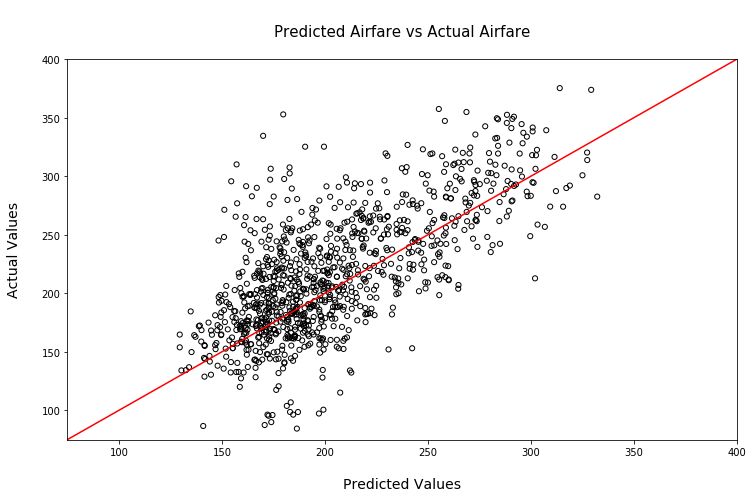

In [62]:
y = data['fare']
yhat = data['y_hat']
z = data['passengers']

plt.figure(figsize =  (12, 7))
#plt.scatter(yhat, y, s = z*.10, alpha=0.5)
plt.scatter(yhat,y, s = 26,  facecolors='none', edgecolors='black')
plt.title('\nPredicted Airfare vs Actual Airfare\n', fontsize = 15)
plt.xlabel('\nPredicted Values', fontsize = 14)
plt.ylabel('Actual Values\n', fontsize = 14)
plt.xlim(75, 400)
plt.ylim(75, 400)

x_line = [75, 400]
y_line = [75, 400]
plt.plot(x_line, y_line, color = 'red')
plt.show()

## Residual Plot

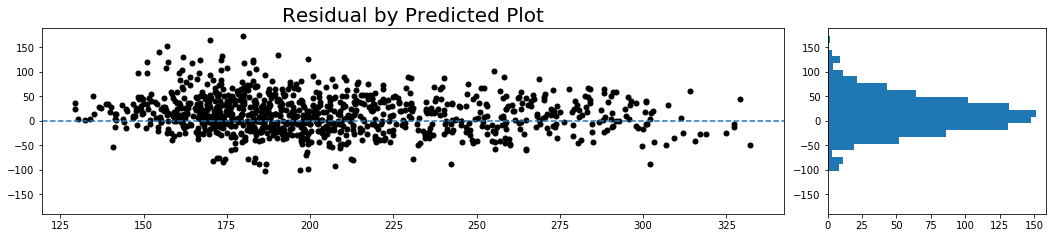

In [63]:
fig = plt.figure(figsize = (18,7))
ax1 = plt.subplot2grid((8, 4), (0, 0), rowspan=4, colspan=3)
ax2 = plt.subplot2grid((8, 4), (0, 3), rowspan=4, colspan=1)

ax1.scatter(data['y_hat'], data['y_err'], s = 25, color = 'black')
ax1.axhline(y=0, linestyle = '--')
ax1.set_ylim(bottom = -data['y_err'].max()*1.10,top = data['y_err'].max()*1.10)
ax1.set_title('Residual by Predicted Plot', fontsize = 20)
ax2.hist(data['y_err'], bins = 20, orientation='horizontal')
ax2.set_ylim(bottom = -data['y_err'].max()*1.10,top = data['y_err'].max()*1.10)
plt.show()

## Cook's Distance

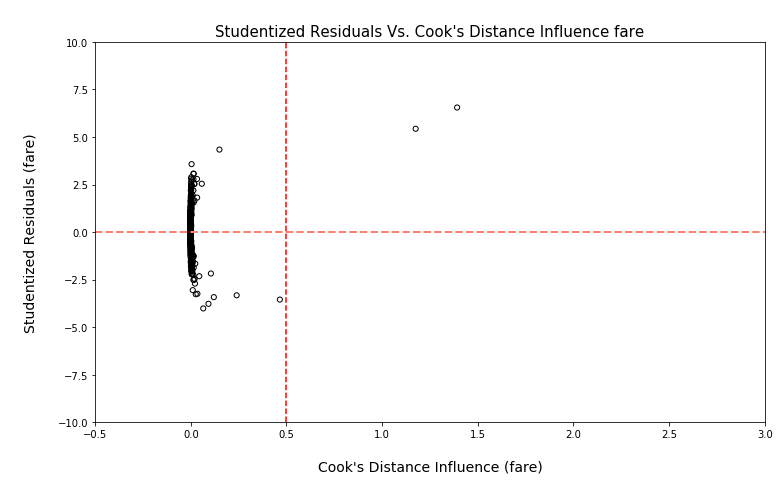

In [64]:
plt.figure(figsize = (12,7))
plt.scatter(data['cooks_d'],data['y_st'], s = 26,  facecolors='none', edgecolors='black')
plt.title("\nStudentized Residuals Vs. Cook's Distance Influence fare", fontsize = 15)
plt.axhline(y = 0, color = 'salmon', linestyle = '--', linewidth = 2)
plt.axvline(x = 0.5, linestyle = '--', color = 'red')
plt.xlabel("\nCook's Distance Influence (fare)\n", fontsize = 14)
plt.ylabel('\nStudentized Residuals (fare)\n', fontsize = 14)

plt.xlim(-0.5, 3.0)
plt.ylim(-10.0, 10.0)
plt.show()

In [65]:
data.loc[data['cooks_d'] > 0.5] 

,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,slot_controlled,partially_controlled,resort_city,y,y_hat,y_err,y_st,h,cooks_d
81221,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,12356,373.73,UA,0.2396,379.02,B6,0.1952,325.52,1,0,0,373.73,329.220752,44.509248,5.433316,0.140778,1.175578
81931,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2619,9608,375.20,UA,0.2935,448.42,B6,0.1639,310.11,1,0,1,375.20,313.977620,61.222380,6.551050,0.119105,1.392132


# THE REST WILL BE SOLVED IN SUBSEQUENT LESSONS AFTER WE LEARN ABOUT MULTIPLE LINEAR REGRESSION

# CAUTIONARY NOTE ABOUT R-SQUARED !!!!

<b>One cannot directly compare R2 values obtained from LS and WLS fits to the same data!</b>

<b>CITATION:</b>

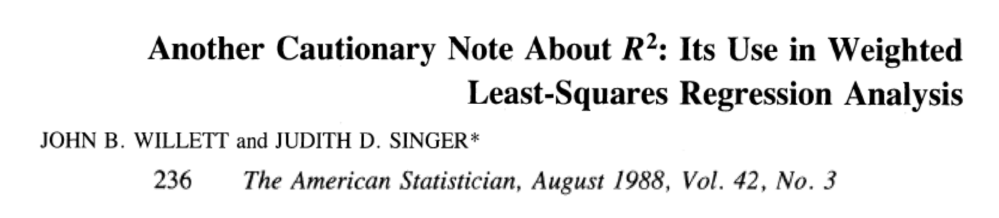




- It is possible to calculate weighted least squares (WLS) estimates by calculating the least squares (LS) estimates for a model which is based on a transformed version of Y and X.
- Providing that the weighting scheme has been chosen appropriately to counter act the non constant variance of the random errors, a better fit will be achieved by WLS in the transformed world. Thus the coefficient of determination obtained from a statistical computer package under WLS regression is frequently much larger than the value obtained under the corresponding LS fit.
- The bottom line is that one cannot directly compare